=== Logistic Regression ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



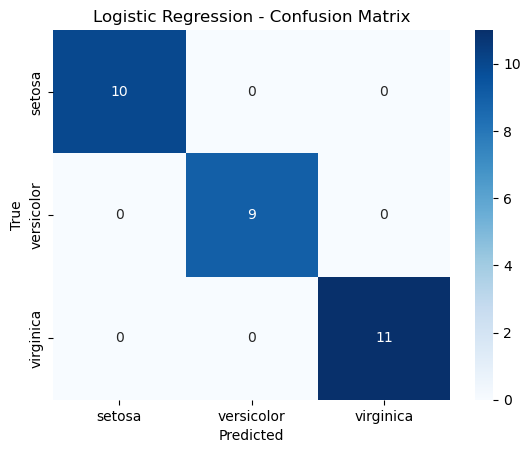


=== Decision Tree ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



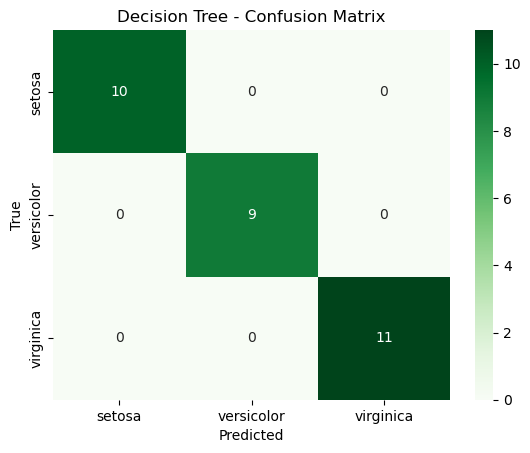

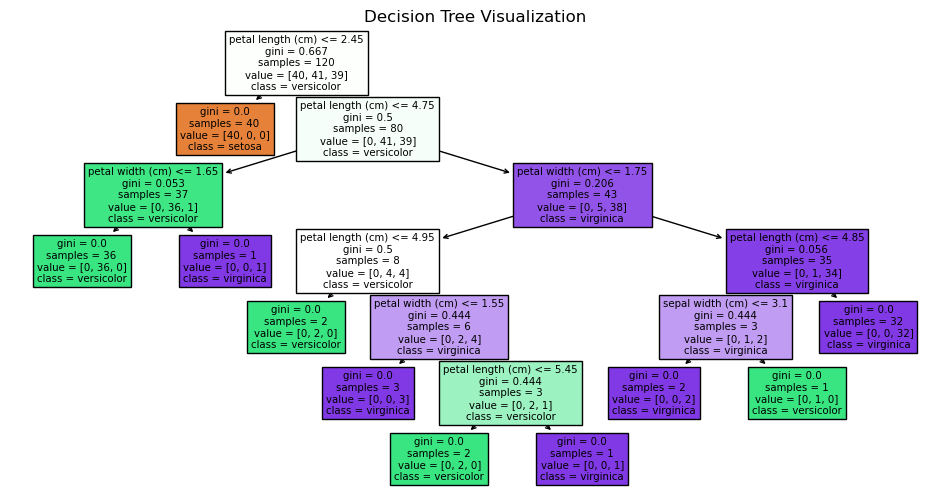


Prediction for sample [5.0, 3.4, 1.5, 0.2]: setosa


In [1]:
# Iris Flower Classification Project

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ------------------------------
# Load Dataset
# ------------------------------
data = load_iris()
X = data.data   # all 4 features
y = data.target # labels (0=Setosa, 1=Versicolor, 2=Virginica)

# ------------------------------
# Train-Test Split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# Logistic Regression Model
# ------------------------------
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# Confusion Matrix Heatmap
cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ------------------------------
# Decision Tree Model
# ------------------------------
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix Heatmap
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, cmap="Greens", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# ------------------------------
# Prediction for New Sample
# ------------------------------
sample = np.array([[5.0, 3.4, 1.5, 0.2]])  # given input
prediction = clf.predict(sample)
print("\nPrediction for sample [5.0, 3.4, 1.5, 0.2]:", data.target_names[prediction][0])
